In [7]:
import json
import pandas as pd
import numpy as np
import spotify
import spotipy
import time
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
import csv
import matplotlib.pyplot as plt

df1 = pd.read_json('StreamingHistory_music_0.json')
df2 = pd.read_json('StreamingHistory_podcast_0.json')
df = pd.concat([df1,df2], ignore_index=True)
client_id = 'afe88fb83c6144d8b3fce6547373bb96'
client_secret = '8efd0a8ad69349dc8aa3361e737a4f9e'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [8]:
artistNames = set(df['artistName'])
artistGenreMap = {key: None for key in artistNames}


In [9]:
# for artist in artistGenreMap:
#   artistGenreMap[artist] = sp.search(q=artist, type='artist')
#   time.sleep(0.4)

In [10]:
with open('/home/anqidai/MDST/artistGenreMap.csv',) as csv_file: 
    reader = csv.reader(csv_file) 
    mydict = dict(reader)

artistGenreMap = {}
with open('artistGenreMap.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        artist = row[0]
        genres = eval(row[1]) if row[1] != 'None' else []
        artistGenreMap[artist] = genres


In [11]:
# write artist-to-genre map into csv file for later use
with open('artistGenreMap.csv', 'w')as csv_file:
    writer = csv.writer(csv_file) 
    for key, value in artistGenreMap.items(): 
        writer.writerow([key, value])


In [12]:
def print_keys(data, prefix=''):
    if isinstance(data, dict):
        for key in data.keys():
            print(f"{prefix}{key}")
            print_keys(data[key], prefix=prefix + "  ")
    elif isinstance(data, list):
        for item in data:
            print_keys(item, prefix=prefix)

In [13]:
result = sp.search(q='Taylor Swift', type='artist', limit=1)
print_keys(result)

artists
  href
  limit
  next
  offset
  previous
  total
  items
    external_urls
      spotify
    followers
      href
      total
    genres
    href
    id
    images
      url
      height
      width
      url
      height
      width
      url
      height
      width
    name
    popularity
    type
    uri


In [14]:

              
for artist in artistGenreMap:
    if artistGenreMap[artist]:
        print(artistGenreMap[artist])  # Access the main dictionary for each artist
        print(artistGenreMap[artist]['artists'])  # Access the 'artists' key within each artist
        print(type(artistGenreMap[artist]['artists']['items']))  # Check type of 'items' (should be a list)
        artistInfo = artistGenreMap[artist]['artists']['items'][0]
        print(artistInfo['genres'])  # Print genres for the first item
        break

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Rainych&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dTzeO0QCd86cXSgQ04Y3r'}, 'followers': {'href': None, 'total': 189374}, 'genres': ['city pop'], 'href': 'https://api.spotify.com/v1/artists/3dTzeO0QCd86cXSgQ04Y3r', 'id': '3dTzeO0QCd86cXSgQ04Y3r', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb8dcef2d62133a6affb1eb167', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab676161000051748dcef2d62133a6affb1eb167', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f1788dcef2d62133a6affb1eb167', 'width': 160}], 'name': 'Rainych', 'popularity': 46, 'type': 'artist', 'uri': 'spotify:artist:3dTzeO0QCd86cXSgQ04Y3r'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/7Fhhko71irKWbkQQ0WWI0b'}, 'followers': {'href': None, 'total': 1419}, 'genres': ['rain'], 'href': 'https://api.spotify.com/v1/artis

In [15]:
updatedArtistToGenreMap = {}
for artist in artistGenreMap:
   try:
       updatedArtistToGenreMap[artist] =  artistGenreMap[artist]['artists']['items'][0]['genres']
   except:
       updatedArtistToGenreMap[artist] = None

/tmp/ipykernel_731/2599655189.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_counts), y=list(top_genres), palette='coolwarm')


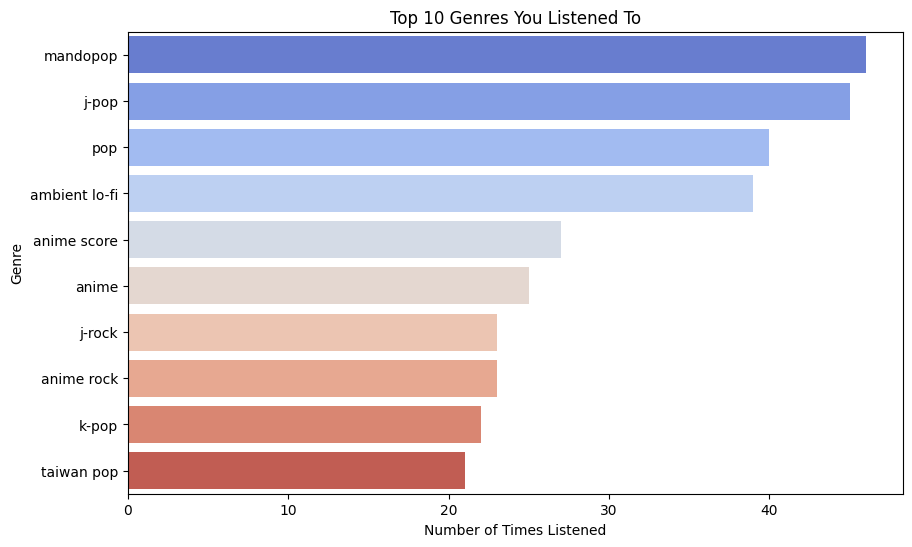

In [16]:
import collections
all_genres = [genre for genres in updatedArtistToGenreMap.values() if genres for genre in genres]

# Count the frequency of each genre
genre_counts = collections.Counter(all_genres)

# Get the top 10 genres
top_genres, top_counts = zip(*genre_counts.most_common(10))

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_counts), y=list(top_genres), palette='coolwarm')
plt.title('Top 10 Genres You Listened To')
plt.xlabel('Number of Times Listened')
plt.ylabel('Genre')
plt.show()

/tmp/ipykernel_731/447138024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


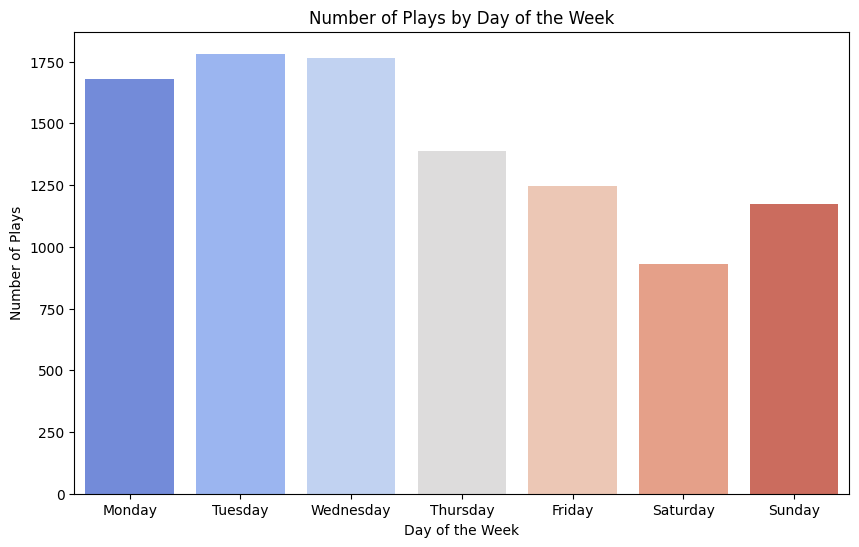

In [17]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['day_of_week'] = df['endTime'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Number of Plays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.show()

In [18]:
df_apple = pd.read_json('Apple Music Library Tracks.json')
exploded_genres = df_apple.explode('Genre')
top_genres = exploded_genres['Genre'].value_counts().head(100)

In [19]:
apple_music_genres = top_genres.index.tolist()
print (apple_music_genres)


['R&B/Soul', 'K-Pop', 'Dance', 'Pop', 'Alternative', 'Singer/Songwriter', 'Hip-Hop/Rap', '@NaijaMusic.Ng', 'Folk']


In [20]:
def rec_generator(genre):
    rec_genre = genre
    rec_song = []
    for idx, row in df.iterrows():
        artist = row['artistName']
        genres = updatedArtistToGenreMap.get(artist, [])
        if any(genre.lower() == rec_genre.lower() for genre in genres):
            rec_song.append({'songName': row['trackName'], 
                             'artistName': artist, 
                             'endTime': row['endTime'], 
                             'genres': genres})
            
    rec_df = pd.DataFrame(rec_song)
    top_rec_songs = rec_df['songName'].value_counts().head(10)
    for song in top_rec_songs.index:
        artists = rec_df[rec_df['songName'] == song]['artistName'].unique()
        print(f"{song} by {', '.join(artists)}")

In [21]:
rec_generator('pop')

Cruel Summer by Taylor Swift
Thinking out Loud by Ed Sheeran
Perfect by Ed Sheeran
When We Were Young by Adele
Photograph by Ed Sheeran
Love Story by Taylor Swift
Hello by Adele
Someone Like You by Adele
Love Yourself by Justin Bieber
All of Me by John Legend


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
# accuracy score = (true positive + true negative) / total
# precision score = true positive / (true positive + false positive)


y_pred = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_true = [1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1]
accuracy = accuracy_score(y_true, y_pred)
accuracy





0.75

In [23]:
from sklearn.metrics import precision_score
y_pred = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y_true = [1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1]
precision = precision_score(y_true, y_pred)
precision

np.float64(0.75)

In [24]:
listOfArtist = list(df['artistName'])
artistNames = set(df['artistName'])
df['artistGenres'] = df['artistName'].map(updatedArtistToGenreMap)


In [25]:
correctOrderOfGenres = []
for artist in listOfArtist:
  correctOrderOfGenres.append(updatedArtistToGenreMap)
df = df.assign(genreMethodTwo=correctOrderOfGenres)
df["genreMethodThree"] = correctOrderOfGenres
df.head()

,endTime,artistName,trackName,msPlayed,podcastName,episodeName,day_of_week,artistGenres,genreMethodTwo,genreMethodThree
0,2023-09-23 00:10:00,Burst Blue,Muyuu,2645,NaN,NaN,Saturday,[],"{'Rainych': ['city pop'], 'Orange Ocean': ['ch...","{'Rainych': ['city pop'], 'Orange Ocean': ['ch..."
1,2023-09-24 01:57:00,Hitomi Tohyama,Cathy - 2021 Remaster,174818,NaN,NaN,Sunday,[classic city pop],"{'Rainych': ['city pop'], 'Orange Ocean': ['ch...","{'Rainych': ['city pop'], 'Orange Ocean': ['ch..."
2,2023-09-24 17:39:00,Xfruge,Strange Sensation,10448,NaN,NaN,Sunday,[],"{'Rainych': ['city pop'], 'Orange Ocean': ['ch...","{'Rainych': ['city pop'], 'Orange Ocean': ['ch..."
3,2023-09-24 17:43:00,uko,Signal,222261,NaN,NaN,Sunday,[],"{'Rainych': ['city pop'], 'Orange Ocean': ['ch...","{'Rainych': ['city pop'], 'Orange Ocean': ['ch..."
4,2023-09-24 17:48:00,Hiromi Iwasaki,私らしく,270758,NaN,NaN,Sunday,"[idol kayo, kayokyoku]","{'Rainych': ['city pop'], 'Orange Ocean': ['ch...","{'Rainych': ['city pop'], 'Orange Ocean': ['ch..."


In [26]:
df.to_csv('demoDataWithGenres.csv')
preListOfGenres = df['artistGenres'].tolist()


In [27]:
listOfGenres = []
for aL in preListOfGenres:
    if isinstance(aL, list): 
        listOfGenres.extend(aL)




In [28]:
from wordcloud import WordCloud
import collections

In [29]:
import matplotlib

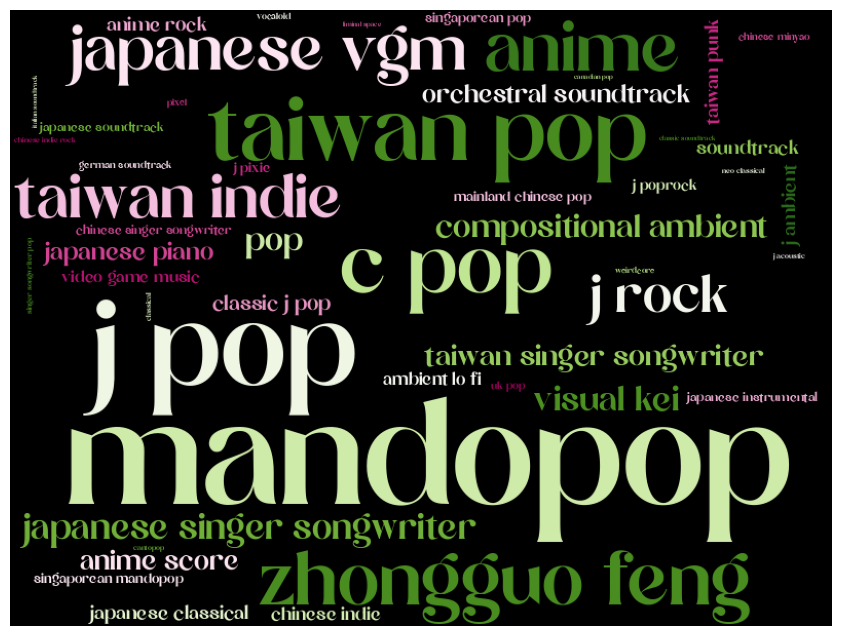

In [30]:
def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15, 8), dpi=200)  # Set higher DPI
    matplotlib.pyplot.imshow(wordcloud, interpolation='bilinear')  # Use 'bilinear' for smoother rendering
    matplotlib.pyplot.axis("off")

counter = collections.Counter(listOfGenres)
genreFrequencies = dict(counter)
def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
font_path = '/home/anqidai/MDST/Calgary_DEMO.ttf'
wordcloud = WordCloud(font_path = font_path,
                    width=800,height=600,
                    max_words=50,
                    relative_scaling=1,
                    normalize_plurals=False,
                    background_color='black',
                    colormap ='PiYG',
                    collocations=False).generate_from_frequencies(genreFrequencies)
plot_cloud(wordcloud)

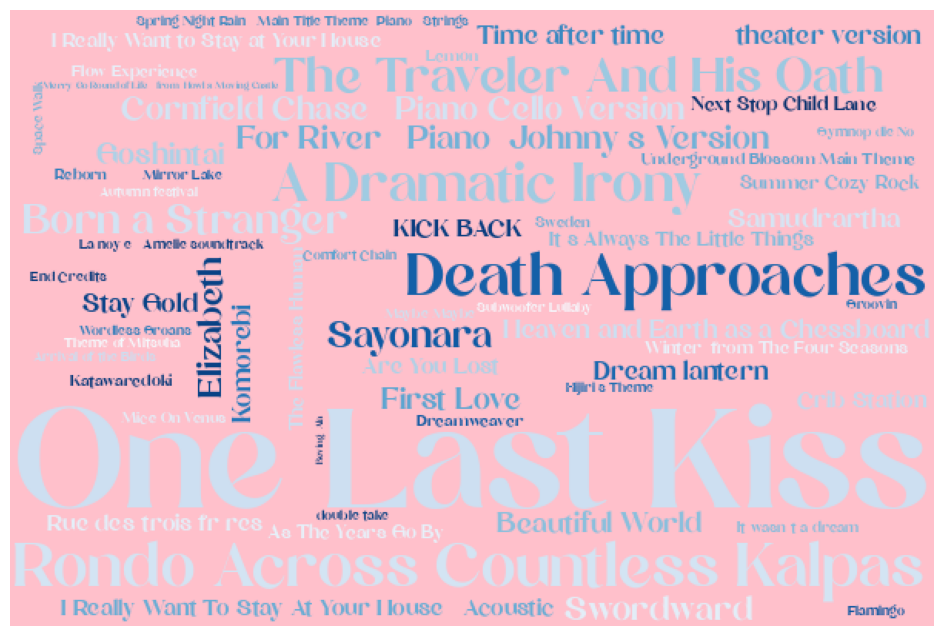

In [31]:
favSongs = df["trackName"].value_counts().to_dict()

def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
font_path = '/home/anqidai/MDST/Calgary_DEMO.ttf'
font_path2 = '/home/anqidai/MDST/evangelion-regular.otf'
wordcloud = WordCloud(font_path = font_path, width=600,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                    collocations=False,
                    background_color='pink',
                    colormap='Blues' ).generate_from_frequencies(favSongs)
plot_cloud(wordcloud)

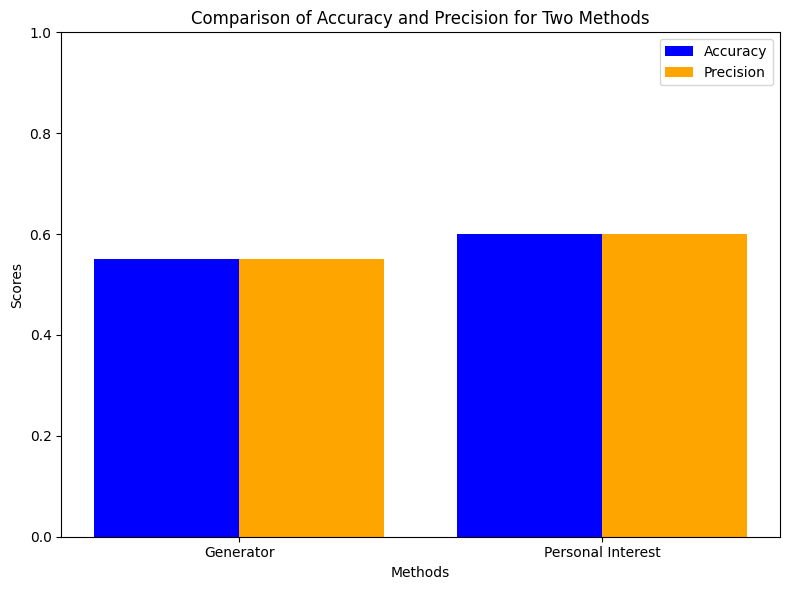

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

# Method 1
y_pred_method1 = [1] * 20  # All predictions are 1
y_true_method1 = [1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
accuracy_method1 = accuracy_score(y_true_method1, y_pred_method1)
precision_method1 = precision_score(y_true_method1, y_pred_method1)

# Method 2
y_pred_method2 = [1] * 20  # All predictions are 1
y_true_method2 = [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
accuracy_method2 = accuracy_score(y_true_method2, y_pred_method2)
precision_method2 = precision_score(y_true_method2, y_pred_method2)

# Data for plotting
methods = ['Generator', 'Personal Interest']
accuracies = [accuracy_method1, accuracy_method2]
precisions = [precision_method1, precision_method2]

# Plotting
x = range(len(methods))  # Bar positions
width = 0.4

plt.figure(figsize=(8, 6))
plt.bar(x, accuracies, width=width, label='Accuracy', color='blue', align='center')
plt.bar([i + width for i in x], precisions, width=width, label='Precision', color='orange', align='center')

# Adding labels and legend
plt.title("Comparison of Accuracy and Precision for Two Methods")
plt.xlabel("Methods")
plt.ylabel("Scores")
plt.xticks([i + width / 2 for i in x], methods)  # Position x-ticks in the middle
plt.ylim(0, 1)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate target-style graphs
def plot_target_graph(data, title, filename):
    """
    Plot a target graph with data points representing accuracy and precision.
    """
    plt.figure(figsize=(6, 6))
    # Draw the target (concentric circles)
    for radius in [1, 2, 3, 4]:
        circle = plt.Circle((0, 0), radius, color='orange', fill=False, linewidth=2)
        plt.gca().add_artist(circle)
    
    # Plot the data points
    x, y = data.T
    plt.scatter(x, y, color='blue', s=50, label="Points")
    
    # Graph settings
    plt.title(title, fontsize=14)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Data simulation for Method 1: High Precision, Low Accuracy (points tightly clustered off-center)
np.random.seed(42)
method1_data = np.random.normal(loc=[3, 3], scale=0.5, size=(20, 2))  # Clustered off-center

# Data simulation for Method 2: High Accuracy, Low Precision (points scattered around the center)
method2_data = np.random.normal(loc=[0, 0], scale=2, size=(20, 2))  # Scattered around center

# Plotting the graphs
plot_target_graph(method1_data, "Method 1: High Precision, Low Accuracy", "method1_target.png")
plot_target_graph(method2_data, "Method 2: High Accuracy, Low Precision", "method2_target.png")


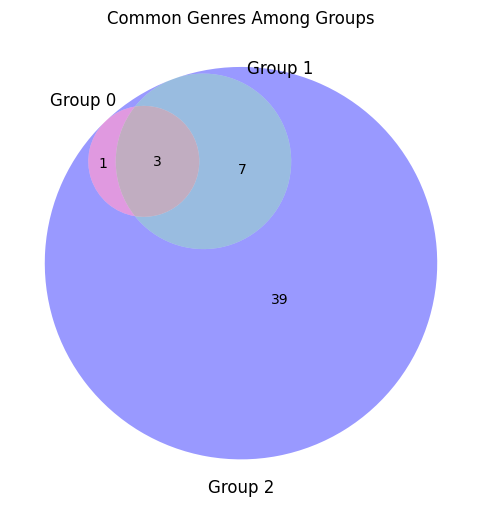

In [34]:
import pandas as pd

# Load the files
group0 = pd.read_csv('/home/anqidai/MDST/group0genres.csv', header=None, names=['Genre']).squeeze('columns')
group1 = pd.read_csv('/home/anqidai/MDST/group1genres.csv', header=None, names=['Genre']).squeeze('columns')
group2 = pd.read_csv('/home/anqidai/MDST/group2genres.csv', header=None, names=['Genre']).squeeze('columns')

# Convert to sets
group0_set = set(group0)
group1_set = set(group1)
group2_set = set(group2)

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
venn3([group0_set, group1_set, group2_set], ('Group 0', 'Group 1', 'Group 2'))
plt.title("Common Genres Among Groups")
plt.show()


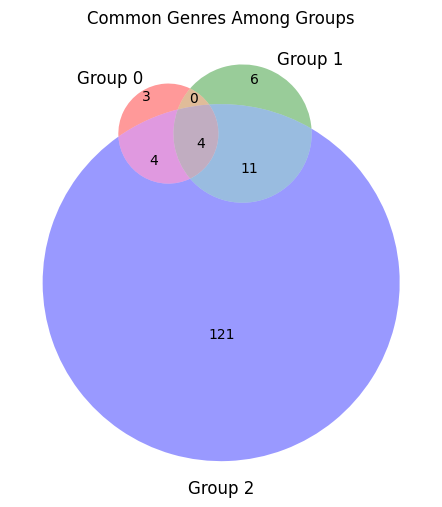

In [36]:
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Replace these paths with your local file paths
group0_path = '/home/anqidai/MDST/group0genres.csv'
group1_path = '/home/anqidai/MDST/group1genres.csv'
group2_path = '/home/anqidai/MDST/group2genres.csv'

group0_genres = pd.read_csv(group0_path, header=None)[0].tolist()
group1_genres = pd.read_csv(group1_path, header=None)[0].tolist()
group2_genres = pd.read_csv(group2_path, header=None)[0].tolist()

# Create sets for Venn Diagram
group0_set = set(group0_genres)
group1_set = set(group1_genres)
group2_set = set(group2_genres)

# Plot the Venn Diagram
plt.figure(figsize=(8, 6))
venn = venn3([group0_set, group1_set, group2_set], ('Group 0', 'Group 1', 'Group 2'))
plt.title("Common Genres Among Groups")
plt.show()
